# 1.Problem Definiton

The goal of this project is to develop a deep learning-based solution for automatically classifying user comments on the Hespress news platform into three categories: negative, neutral, and positive. This project aims to create a robust and scalable RNN-based model capable of analyzing and understanding the sentiment expressed in comments, facilitating insightful feedback analysis and improving user engagement on the platform.


This solution focuses on analyzing comments written in the Arabic language. Therefore, we gathered all Arabic-language comments belonging to different categories such as Economy, Politics, Society, International, and others.

# 2.Methodology of Problem Solving

## 1. Dataset collection and preprocessing
#### a. Import libriraies and load data

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk 
from camel_tools.sentiment import SentimentAnalyzer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Attention, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from camel_tools.tokenizers.word import simple_word_tokenize

In [25]:
import camel_tools
print(camel_tools.__version__)


1.5.5


In [4]:
# Load the dataset
df = pd.read_csv('hespress_comments.csv')

# Display the first few rows to ensure it's loaded correctly
print(df.head())

                  date                                              title  \
0  2024-11-21 13:50:34  شركة أمريكية تقدم خدمات "أنظمة تخطيط مهام" للق...   
1  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   
2  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   
3  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   
4  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   

                                             comment   category  \
0  المغرب المغاربة اليوم أقوى من اي وقت مضى بالجم...  politique   
1  يجب على المغرب استغلال فرصة ترأسه لمجلس حقوق ا...  politique   
2  فرصة ثمينة لطرح ملف المحتجزين في مخيمات الذل و...  politique   
3  لنكون واقعيين ،مكاين لا حقوق الإنسان والحيوان ...  politique   
4  هذه الثقة والتشريف  لا ياتيان من فراغ  …نحن ال...  politique   

                                         article_url  
0  https://www.hespress.com/%d8%b4%d8%b1%d9%83%d8...  
1  https://www.hespress.

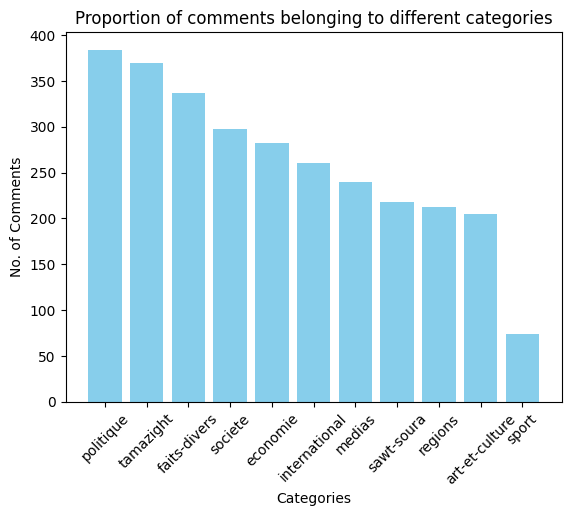

In [5]:
# Count the number of comments per category
category_counts = df['category'].value_counts()

# Create the bar chart
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("No. of Comments")
plt.title("Proportion of comments belonging to different categories")

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [6]:
# Initialize CAMeL's sentiment analyzer
sa = SentimentAnalyzer("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment = sa.predict(text)
    return sentiment[0]  # Extract the first element from the list (e.g., 'positive', 'negative', 'neutral')

# Apply sentiment analysis to the cleaned comments
df['sentiment'] = df['comment'].apply(analyze_sentiment)

# Check the updated DataFrame
print(df.head())


                  date                                              title  \
0  2024-11-21 13:50:34  شركة أمريكية تقدم خدمات "أنظمة تخطيط مهام" للق...   
1  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   
2  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   
3  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   
4  2024-11-21 13:50:36  في "سابقة تاريخية" .. المغرب يستضيف خلوة مجلس ...   

                                             comment   category  \
0  المغرب المغاربة اليوم أقوى من اي وقت مضى بالجم...  politique   
1  يجب على المغرب استغلال فرصة ترأسه لمجلس حقوق ا...  politique   
2  فرصة ثمينة لطرح ملف المحتجزين في مخيمات الذل و...  politique   
3  لنكون واقعيين ،مكاين لا حقوق الإنسان والحيوان ...  politique   
4  هذه الثقة والتشريف  لا ياتيان من فراغ  …نحن ال...  politique   

                                         article_url sentiment  
0  https://www.hespress.com/%d8%b4%d8%b1%d9%83%d8...  positive  
1  h

In [7]:
# Save the updated DataFrame to a new CSV file
df.to_csv('labeled_comments.csv', index=False)

C:\Users\asmao\AppData\Local\Temp\ipykernel_17364\2838035961.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


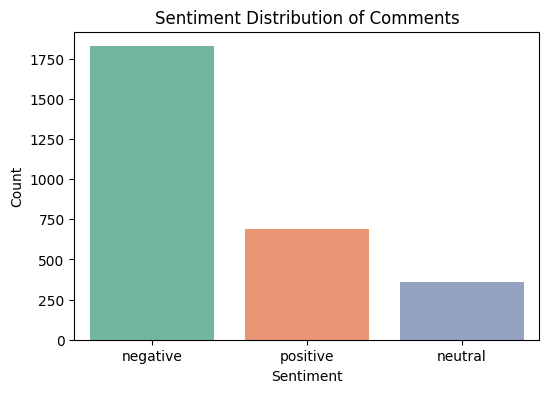

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')

# Add titles and labels
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


sentiment       negative  neutral  positive
category                                   
art-et-culture       122       29        54
economie             197       35        50
faits-divers         241       35        61
international        178       29        53
medias               156       31        53
politique            176       47       161
regions              137       30        45
sawt-soura           142       27        49
societe              193       33        71
sport                 41        9        24
tamazight            243       57        70


<Figure size 1200x700 with 0 Axes>

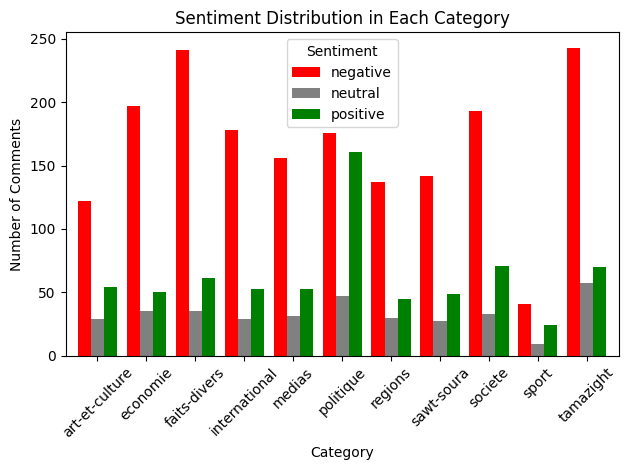

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the sentiment column exists, if not, apply sentiment analysis
if 'sentiment' not in df.columns:
    df['sentiment'] = df['comment'].apply(analyze_sentiment)

# Count the number of positive, negative, and neutral comments in each category
sentiment_counts = df.groupby(['category', 'sentiment']).size().unstack(fill_value=0)

# Display the counts of negative, positive, and neutral comments in each category
print(sentiment_counts)

# Plotting
plt.figure(figsize=(12, 7))

# Create a bar plot with each category on the x-axis and sentiment counts on the y-axis
sentiment_counts.plot(kind='bar', stacked=False, color=['red', 'grey', 'green'], width=0.8)

# Add titles and labels
plt.title('Sentiment Distribution in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)

# Add a legend to indicate sentiment types
plt.legend(title='Sentiment', labels=['negative', 'neutral', 'positive'])

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


#### b. Text cleaning

The first step is to clean the text data by removing any irrelevant or noisy information. This typically involves converting the text to lowercase, removing special characters, punctuation, and other non-alphanumeric characters that may not contribute to sentiment analysis.

In [27]:
import re
import nltk
from camel_tools.tokenizers.word import simple_word_tokenize
from nltk.corpus import stopwords

# Download NLTK stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))

# Function to clean Arabic text
def clean_arabic_text(text):
    # Step 1: Remove non-Arabic characters (except spaces)
    text = re.sub(r'[^ء-ي\s]', '', text)  # Arabic letters and spaces only
    
    # Step 2: Normalize Arabic characters (e.g., إ → ا, ئ → ي)
    text = re.sub(r'[إأآء]', 'ا', text)  # Normalize common variations of 'أ' and 'إ'
    text = re.sub(r'[ى]', 'ي', text)  # Normalize 'ى' to 'ي'
    text = re.sub(r'[ة]', 'ه', text)  # Normalize 'ة' to 'ه'
    
    # Step 3: Handle repeated characters (e.g., "ممتاز" to "م")
    text = re.sub(r'(.)\1+', r'\1', text)  # Replace repeated characters with one occurrence

    # Step 4: Remove extra spaces
    text = ' '.join(text.split())  # Remove extra spaces

    # Step 5: Remove stop words
    text = ' '.join([word for word in simple_word_tokenize(text) if word not in stop_words])

    return text

# Apply the cleaning function to your DataFrame
df['cleaned_comment'] = df['comment'].apply(clean_arabic_text)

# Check the cleaned text
print(df[['comment', 'cleaned_comment']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             comment  \
0  المغرب المغاربة اليوم أقوى من اي وقت مضى بالجم...   
1  يجب على المغرب استغلال فرصة ترأسه لمجلس حقوق ا...   
2  فرصة ثمينة لطرح ملف المحتجزين في مخيمات الذل و...   
3  لنكون واقعيين ،مكاين لا حقوق الإنسان والحيوان ...   
4  هذه الثقة والتشريف  لا ياتيان من فراغ  …نحن ال...   

                                     cleaned_comment  
0  المغرب المغاربه اليوم اقوي اي وقت مضي بالجميع ...  
1  يجب علي المغرب استغلال فرصه تراسه لمجلس حقوق ا...  
2  فرصه ثمينه لطرح ملف المحتجزين مخيمات الذل والع...  
3  لنكون واقعين مكاين حقوق الانسان والحيوان والبغ...  
4  الثقه والتشريف ياتيان فراغ اليوم نفتخر بانتمائ...  


#### c.Tokenization
Tokenization is the process of splitting the text into individual words or tokens. This step is crucial as it converts the text into a format suitable for further analysis. Each word or token represents a feature that the model can learn from.

In [28]:
# Example: Tokenize the cleaned Arabic text
df['tokenized_comment'] = df['cleaned_comment'].apply(simple_word_tokenize)

# Print the tokenized text
print(df[['comment', 'cleaned_comment', 'tokenized_comment']].head())


                                             comment  \
0  المغرب المغاربة اليوم أقوى من اي وقت مضى بالجم...   
1  يجب على المغرب استغلال فرصة ترأسه لمجلس حقوق ا...   
2  فرصة ثمينة لطرح ملف المحتجزين في مخيمات الذل و...   
3  لنكون واقعيين ،مكاين لا حقوق الإنسان والحيوان ...   
4  هذه الثقة والتشريف  لا ياتيان من فراغ  …نحن ال...   

                                     cleaned_comment  \
0  المغرب المغاربه اليوم اقوي اي وقت مضي بالجميع ...   
1  يجب علي المغرب استغلال فرصه تراسه لمجلس حقوق ا...   
2  فرصه ثمينه لطرح ملف المحتجزين مخيمات الذل والع...   
3  لنكون واقعين مكاين حقوق الانسان والحيوان والبغ...   
4  الثقه والتشريف ياتيان فراغ اليوم نفتخر بانتمائ...   

                                   tokenized_comment  
0  [المغرب, المغاربه, اليوم, اقوي, اي, وقت, مضي, ...  
1  [يجب, علي, المغرب, استغلال, فرصه, تراسه, لمجلس...  
2  [فرصه, ثمينه, لطرح, ملف, المحتجزين, مخيمات, ال...  
3  [لنكون, واقعين, مكاين, حقوق, الانسان, والحيوان...  
4  [الثقه, والتشريف, ياتيان, فراغ, اليوم, نفتخر, ..

#### d. Padding:

To ensure that all sequences have the same length, we pad or truncate them to a fixed length. Padding is typically done by adding zeros to the end of shorter sequences, while truncating removes excess words from longer sequences.

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000)  # You can set the maximum number of words in the vocabulary

# Fit the tokenizer on your tokenized comments (cleaned and tokenized text)
tokenizer.fit_on_texts(df['tokenized_comment'])  # 'tokenized_comment' column should be the list of tokens

# Convert the text (tokenized comments) to sequences of integers
X = tokenizer.texts_to_sequences(df['tokenized_comment'])

# Pad the sequences to ensure uniform length (e.g., 100 tokens per comment)
X_pad = pad_sequences(X, padding='post', maxlen=100)

# Check the padded sequences
print(X_pad[:5])  # Print the first 5 padded sequences to verify


[[   6   15   61  925   14  170 4323 3473 3315 4324  373    1 1009  240
  3316  404 3761 4325    3 3071 4326 2046  131 3133 3762 3763 3764 3765
   584 3474 3475 3317 3318 3766 3767 3473 3315  449    6   15 3199  373
  3768 3769 3770 3771    4 3476 3319 3200 3772 4327  253   96  253 3477
  3201  108    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   8    1    6  405  154  171  144 4328 3320 1010 4329    1  100  849
  3478  100 4330 4331 3773 3774   31  809    6   49 4332  100 3320 1011
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

#### e. Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode sentiment labels
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Check the label encoding
print(df[['sentiment', 'encoded_sentiment']].head())


  sentiment  encoded_sentiment
0  positive                  2
1  negative                  0
2  negative                  0
3  negative                  0
4  positive                  2


#### f. Train-Test Split
Split the dataset into training and test sets.

In [41]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pad, df['encoded_sentiment'], test_size=0.2, random_state=42)
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of test data (X_test): {X_test.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of test labels (y_test): {y_test.shape}")

Shape of training data (X_train): (2303, 100)
Shape of test data (X_test): (576, 100)
Shape of training labels (y_train): (2303,)
Shape of test labels (y_test): (576,)


## 2. Model training and optimization

In [128]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Attention, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Parameters
max_length = 100  # Max sequence length (for padding)
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size from the tokenizer

# Input layer
input_layer = Input(shape=(max_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length)(input_layer)

# LSTM layer
# lstm_layer = LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01))(embedding_layer)
from tensorflow.keras.layers import Bidirectional
lstm_layer = Bidirectional(LSTM(256, return_sequences=True))(embedding_layer)

dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(flatten_layer)
# Attention layer
attention_output = Attention()([lstm_layer, lstm_layer])

# Flatten attention output and add dense layers
flatten_layer = Flatten()(attention_output)
dense_layer = Dense(64, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Output layer (for multi-class classification)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Define the learning rate
learning_rate = 0.001  # You can adjust this value based on your needs

# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=learning_rate)
# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


c:\Users\asmao\Downloads\hespress-Articles-sentiment-analyzer-main\hespress-Articles-sentiment-analyzer-main\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 100, 128)  │  1,752,064 │ input_layer_13[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 100, 512)  │    788,480 │ embedding_13[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_13        │ (None, 100, 512)  │          0 │ bidirectional[0]… │
│ (Attention)         │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 51200)     │          0 │ attention_13[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │  3,276,864 │ flatten_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ dense_24[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 3)         │        195 │ dropout_13[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,817,603 (22.19 MB)

 Trainable params: 5,817,603 (22.19 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[early_stopping])


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 507ms/step - accuracy: 0.5965 - loss: 0.9539 - val_accuracy: 0.6024 - val_loss: 0.8821
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 36s 500ms/step - accuracy: 0.6565 - loss: 0.7716 - val_accuracy: 0.5885 - val_loss: 0.6463
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 34s 476ms/step - accuracy: 0.7474 - loss: 0.5434 - val_accuracy: 0.7639 - val_loss: 0.4866
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 36s 500ms/step - accuracy: 0.8478 - loss: 0.3718 - val_accuracy: 0.8698 - val_loss: 0.4562
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 523ms/step - accuracy: 0.9107 - loss: 0.2621 - val_accuracy: 0.8594 - val_loss: 0.5947
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 522ms/step - accuracy: 0.9408 - loss: 0.1715 - val_accuracy: 0.8594 - val_loss: 0.8122
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 553ms/step - accuracy: 0.9483 - loss: 0.1114 - val_accuracy: 0.8819 - val_loss: 1.0173


In [130]:
from sklearn.metrics import accuracy_score

# Step 1: Get the predicted sentiments (if not already done)
predicted_sentiments = model.predict(X_test)
predicted_sentiments_classes = predicted_sentiments.argmax(axis=1)  # Get predicted class labels

# Step 2: Compare the predicted sentiments with the true sentiments
accuracy = accuracy_score(y_test, predicted_sentiments_classes)

# Step 3: Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
Accuracy: 86.98%


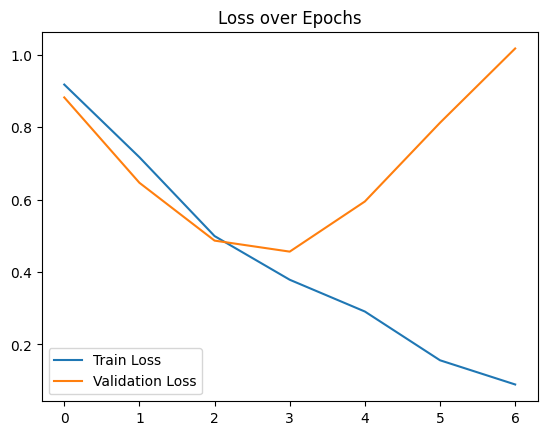

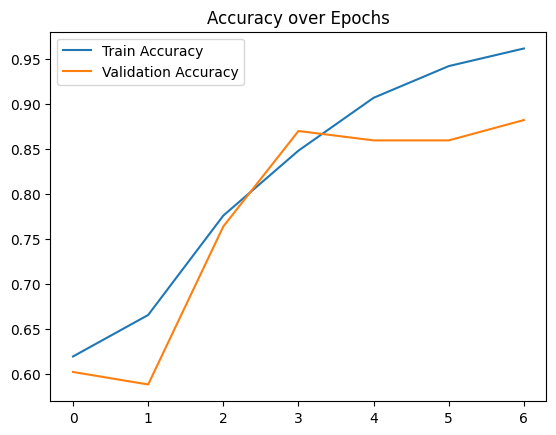

In [131]:
import matplotlib.pyplot as plt

# Plot training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


## 3. Evaluation and validation: 

Evaluate the trained model's performance using appropriate evaluation metrics such confusion_matrix. Validate the model's effectiveness by testing it on a separate test dataset,assessing its ability to correctly classify comments. This step ensures that the model generalizes well to unseendata and reliably identifies sentiment in comments

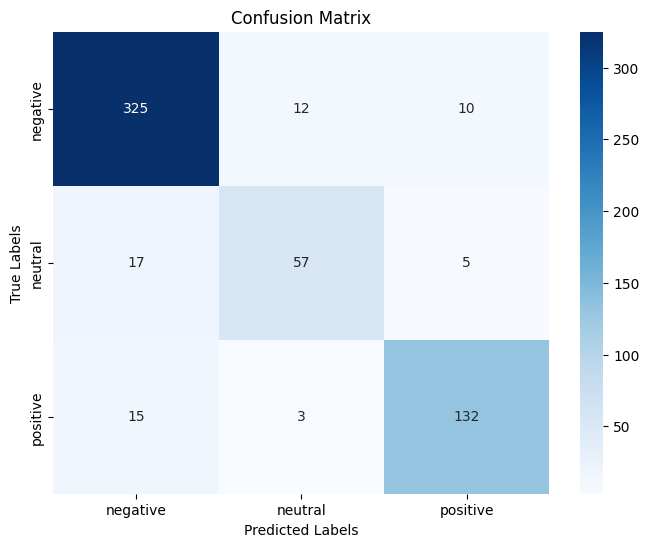

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Make a Prediction: 

Use the model to predict the sentiment of the comment.

In [145]:
test_comments = ["غياب برلماني البيضاء مبرر لانه كانت عندو جنازة في دائرته وهو همه الوحيد خضور الجنازات","أحسن مشروع في برنامج هذه الحكومة سيبقى نقطة إيجابية مميزة ","العقوبات البديلة لديها وجهين واتمنى ان يكون الوجه الايجابي اكثر من السلبي"]
test_comments_cleaned = [clean_arabic_text(c) for c in test_comments]
test_comments_tokenized = tokenizer.texts_to_sequences(test_comments_cleaned)
test_comments_padded = pad_sequences(test_comments_tokenized, maxlen=max_length, padding='post')

predictions = model.predict(test_comments_padded)
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)  # Check the predicted classes for each comment


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
[0 2 2]
